#### The dataset in which we will be using here was obtained via open sources.

---

Let's begin with importing our needed libraries.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14

Now, let's load in the Capital Bikeshare dataset.

In [2]:
path = './data/bikeshare.csv'
bikes = pd.read_csv(path, index_col='datetime', parse_dates=True)

Let's check out the data.

In [3]:
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikes.tail(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Let's check out the information associated with the dataset (provided by kaggle).

| Variable| Description |
|---------|----------------|
|datetime| hourly date + timestamp  |
|season|  1=winter, 2=spring, 3=summer, 4=fall |
|holiday| whether the day is considered a holiday|
|workingday| whether the day is neither a weekend nor holiday|
|weather| See Below|
|temp| temperature in Celsius|
|atemp| "feels like" temperature in Celsius|
|humidity| relative humidity|
|windspeed| wind speed|
|casual| number of non-registered user rentals initiated|
|registered| number of registered user rentals initiated|
|count| number of total rentals|

> _Details on Weather Variable_

> **1**: Clear, Few clouds, Partly cloudy, Partly cloudy

> **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

> **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

> **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Let's rename some of these columns.

In [5]:
bikes.rename(columns={'season':'season_num', 'holiday':'is_holiday', 'workingday':'is_workingday',
                      'temp':'temp_celcius', 'atemp':'temp_feels_like', 'humidity':'humidity_percent',
                      'windspeed':'windspeed_knots', 'casual':'num_casual_users',
                      'registered':'num_registered_users', 'count':'total_rentals'}, inplace=True)

In [6]:
bikes.columns

Index(['season_num', 'is_holiday', 'is_workingday', 'weather', 'temp_celcius',
       'temp_feels_like', 'humidity_percent', 'windspeed_knots',
       'num_casual_users', 'num_registered_users', 'total_rentals'],
      dtype='object')

Now, let's check out the data visually.

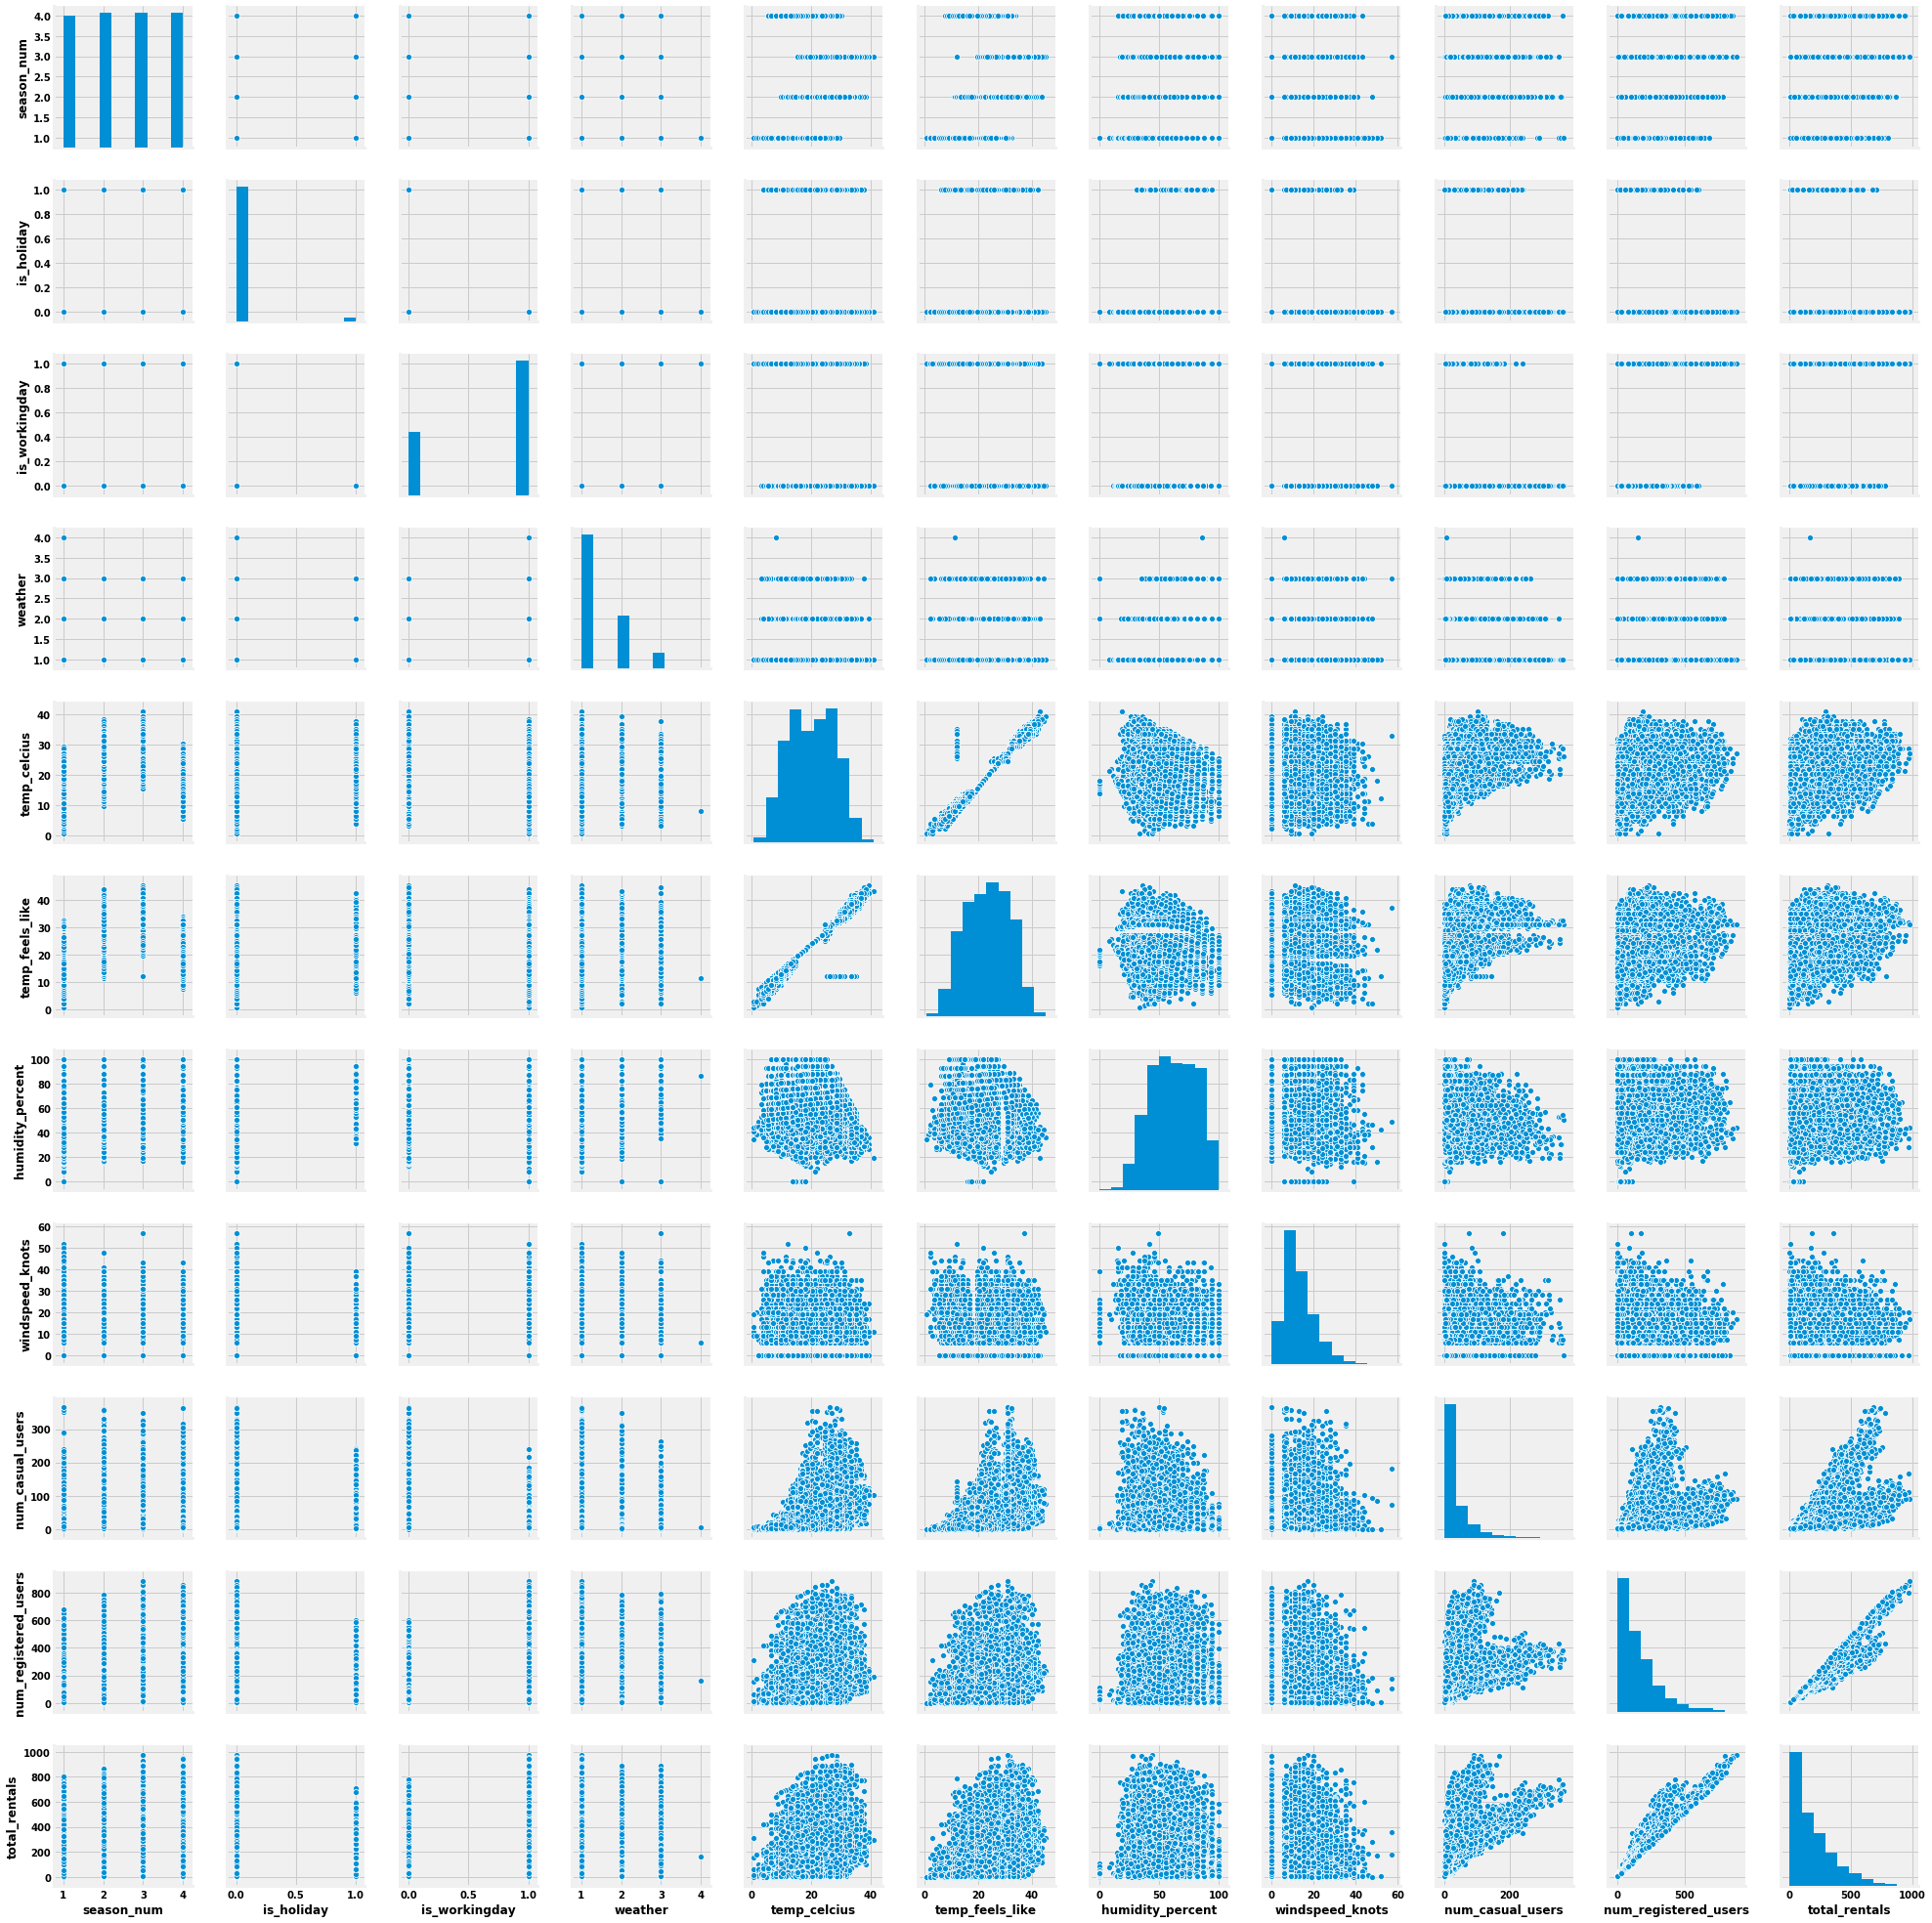

In [7]:
sns.pairplot(bikes);

Observing the pair plot above, we can see there is a trend between the total amount of rentals and the temperature. Let's take a closer look.

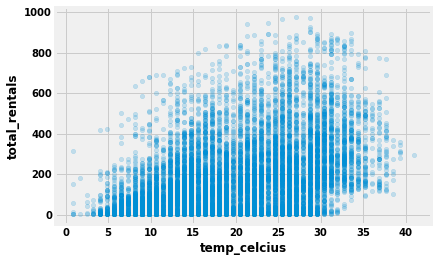

In [8]:
bikes.plot(kind='scatter', x='temp_celcius', y='total_rentals', alpha=0.2);

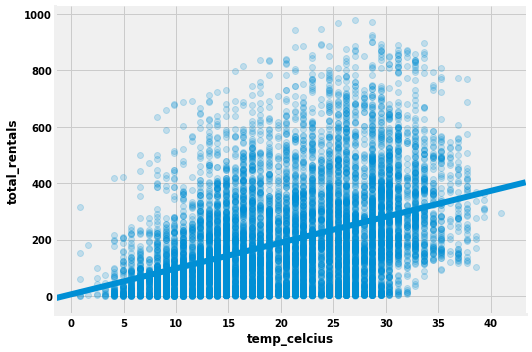

In [9]:
sns.lmplot(data=bikes, x='temp_celcius', y='total_rentals', aspect=1.5, scatter_kws={'alpha':0.2});

Here, our target is the total rentals variable. Let's build a linear regression model.

In [10]:
feature_cols = ['temp_celcius']
X = bikes[feature_cols]
y = bikes.total_rentals

In [11]:
print(type(X))
print(type(X.values))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(10886, 1)


In [12]:
print(type(y))
print(type(y.values))
print(y.shape)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(10886,)


In [13]:
lr = LinearRegression()
print(type(lr))
print(lr)

<class 'sklearn.linear_model.base.LinearRegression'>
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [14]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Predicting number of rentals given temperatures #
X_new = [[0], [10], [20]]
lr.predict(X_new)

array([  6.04621296,  97.75161777, 189.45702259])

In [16]:
print(lr.intercept_)
print(lr.coef_)

6.046212959616781
[9.17054048]


Let's build a linear regression model again but using multiple variables this time.

In [17]:
feature_cols = ['temp_celcius', 'season_num', 'weather', 'humidity_percent']

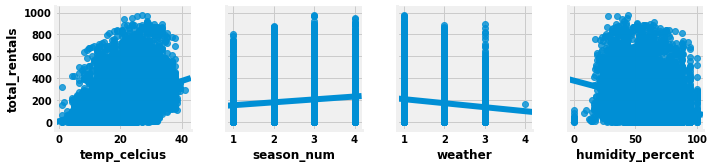

In [18]:
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

In [19]:
# We find that the variables season_num and weather are discrete measurements #
pd.crosstab(bikes.season_num, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season_num,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


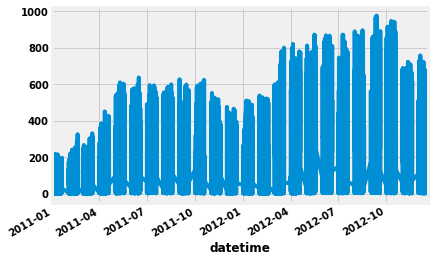

In [20]:
bikes.total_rentals.plot();

In [21]:
# Let's check out a correlation matrix #
bikes.corr()

,season_num,is_holiday,is_workingday,weather,temp_celcius,temp_feels_like,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,total_rentals
season_num,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
is_holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
is_workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp_celcius,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
temp_feels_like,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity_percent,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed_knots,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
num_casual_users,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
num_registered_users,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


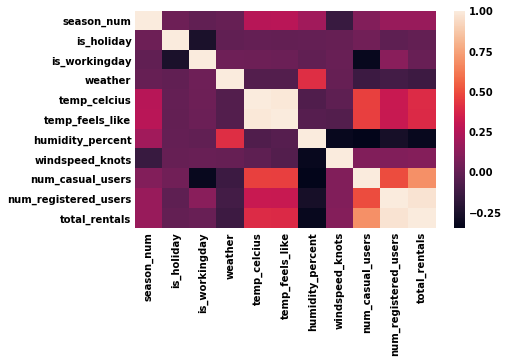

In [22]:
# Visual representation of the information from the previous cell #
sns.heatmap(bikes.corr());

In [23]:
X = bikes[feature_cols]
y = bikes.total_rentals

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(lr.intercept_)
list(zip(feature_cols, lr.coef_))

159.52068786129817


[('temp_celcius', 7.864824992477439),
 ('season_num', 22.53875753246676),
 ('weather', 6.670302035923719),
 ('humidity_percent', -3.118873382396501)]

Let's check for multicollinearity.

                  temp_celcius  temp_feels_like  num_casual_users
temp_celcius          1.000000         0.984948          0.467097
temp_feels_like       0.984948         1.000000          0.462067
num_casual_users      0.467097         0.462067          1.000000


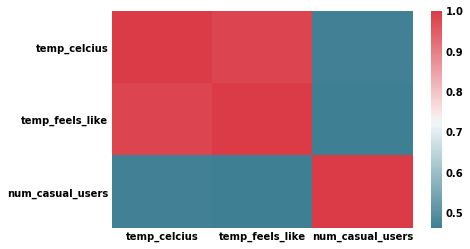

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp_celcius', 'temp_feels_like', 'num_casual_users']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap);

Let's build a linear regression model using only the temperature variables.

In [28]:
feature_cols = ['temp_celcius', 'temp_feels_like']

In [29]:
X = bikes[feature_cols]
y = bikes.total_rentals

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(lr.intercept_)
list(zip(feature_cols, lr.coef_))

4.248132645803736


[('temp_celcius', 8.198658744678806), ('temp_feels_like', 0.9072080844658963)]

Let's create a function that accepts a list of features and returns the testing RMSE for the bikes dataset.

In [33]:
def testing_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Now, we can compare different sets of features.

In [34]:
print(testing_rmse(bikes, ['temp_celcius', 'season_num', 'weather', 'humidity_percent']))
print(testing_rmse(bikes, ['temp_celcius', 'season_num', 'weather']))
print(testing_rmse(bikes, ['temp_celcius', 'season_num', 'humidity_percent']))
print(testing_rmse(bikes, ['num_casual_users', 'num_registered_users']))

155.03496197190037
163.85490663517882
155.0769274780986
6.667086856307742e-14


Let's compare with the null RMSE (a benchmark against which we can measure our regression model).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
y_null = np.zeros_like(y_test, dtype=float)
y_null

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
y_null.fill(y_test.mean())
y_null

array([192.2770022, 192.2770022, 192.2770022, ..., 192.2770022,
       192.2770022, 192.2770022])

In [38]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

181.1464603453299

Our linear regression model is a type of supervised machine learning. However, we must explicitly modify our features to have meaningful relationships that our models can understand and draw conclusions from. Here, we will need to pull out features to have a linear relationship with our target variable. This is known as feature engineering and is needed to improve the performance of our models. Let's continue by handling the categorical features.

In [39]:
season_dummies = pd.get_dummies(bikes.season_num, prefix='season')

In [40]:
season_dummies.sample(n=5, random_state=42)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-07-19 11:00:00,0,0,1,0
2012-01-16 06:00:00,1,0,0,0
2011-12-11 18:00:00,0,0,0,1
2012-08-15 10:00:00,0,0,1,0
2012-06-15 23:00:00,0,1,0,0


We only need three dummy variables, so we'll drop the first dummy variable.

In [41]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [42]:
season_dummies.sample(n=5, random_state=42)

,season_2,season_3,season_4
datetime,,,
2011-07-19 11:00:00,0,1,0
2012-01-16 06:00:00,0,0,0
2011-12-11 18:00:00,0,0,1
2012-08-15 10:00:00,0,1,0
2012-06-15 23:00:00,1,0,0


Now, lets concatenate the two dataframes together; as well as drop the season_num column since we now have dummy variables.

In [43]:
bikes_dummies = pd.concat([bikes, season_dummies], axis=1)

bikes_dummies.sample(n=5, random_state=42)

,season_num,is_holiday,is_workingday,weather,temp_celcius,temp_feels_like,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,total_rentals,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,29,98,127,0,1,0
2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,0,13,13,0,0,0
2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,12,151,163,0,0,1
2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,70,163,233,0,1,0
2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,46,176,222,1,0,0


Let's rerun our linear regression model.

In [44]:
feature_cols = ['temp_celcius', 'season_2', 'season_3', 'season_4', 'humidity_percent']

In [45]:
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
list(zip(feature_cols, lr.coef_))

[('temp_celcius', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.73686071317068),
 ('season_4', 64.41596146824214),
 ('humidity_percent', -2.819481636259646)]

In [49]:
# Compare original season variable with dummy variables #
print(testing_rmse(bikes_dummies, ['temp_celcius', 'season_num', 'humidity_percent']))
print(testing_rmse(bikes_dummies, ['temp_celcius', 'season_2', 'season_3', 'season_4', 'humidity_percent']))

155.0769274780986
154.20482363935454


Let's continue with feature engineering.

In [50]:
# Extract hour of the day to use as a feature #
bikes['hour'] = bikes.index.hour

In [51]:
# Encode hour as a categorical feature #
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [52]:
# Generate a daytime variable based on hour of the day #
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [53]:
# Test the root mean squared error of our various hour encodings #
print(testing_rmse(bikes, ['hour']))
print(testing_rmse(bikes, bikes.columns[bikes.columns.str.startswith('hour_')]))
print(testing_rmse(bikes, ['daytime']))

167.3118731522449
128.39485152117533
147.76084662462532


For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS). For a regularized linear regression model, we minimize the sum of RSS and a 'penalty term' that penalizes coefficient size. Let's try out a ridge regression model.

In [54]:
feature_cols = ['temp_celcius', 'temp_feels_like', 'season_2', 'season_3', 'season_4', 'humidity_percent']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# Alpha=0 is equivalent to linear regression #
ridgereg = Ridge(alpha=0, normalize=True)

# Training #
ridgereg.fit(X_train, y_train)

# Prediction #
y_pred = ridgereg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

list(zip(feature_cols, ridgereg.coef_))

154.1710005081937


[('temp_celcius', 8.785550617053774),
 ('temp_feels_like', 2.2665594039061827),
 ('season_2', -5.5513561111910725),
 ('season_3', -46.05784222726699),
 ('season_4', 65.22111662973279),
 ('humidity_percent', -2.8162542981674523)]

In [57]:
# Let's try alpha=0.1 #
ridgereg = Ridge(alpha=0.1, normalize=True)

# Training #
ridgereg.fit(X_train, y_train)

# Prediction #
y_pred = ridgereg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

list(zip(feature_cols, ridgereg.coef_))

154.31928801679064


[('temp_celcius', 5.285868619541914),
 ('temp_feels_like', 4.271057243627412),
 ('season_2', 3.581559850426206),
 ('season_3', -26.35006579631917),
 ('season_4', 60.5907776858947),
 ('humidity_percent', -2.6203818733647224)]